### Image Compression Via SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [6]:
from skimage import data
from skimage.color import rgb2gray
from skimage import img_as_float

In [11]:
gray_images = {
    'cat': rgb2gray(img_as_float(data.chelsea())),
    'coffee': rgb2gray(img_as_float(data.coffee()))
}
for item in gray_images:
    print(gray_images[item].shape)

(300, 451)
(400, 600)


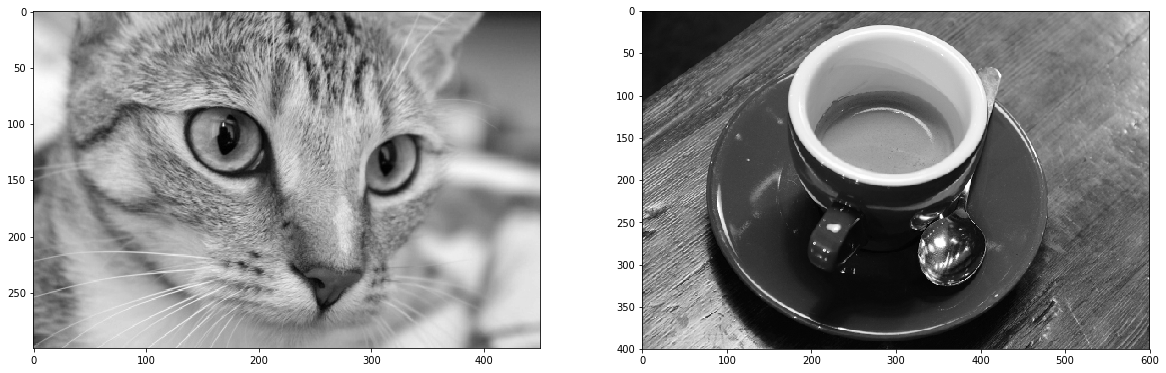

In [14]:
_, axes = plt.subplots(1, 2, figsize=(20, 20))
axes[0].imshow(gray_images['cat'], cmap='gray')
axes[1].imshow(gray_images['coffee'], cmap='gray')

In [16]:
from numpy.linalg import svd

In [52]:
def compress_svd(image, k):
    U, s, V = svd(image, full_matrices=False)
    reconstructed_image = np.dot(U[:, :k], np.dot(np.diag(s[:k]), V[:k, :]))
    return reconstructed_image

In [45]:
def show_compressed_image(image_name, k):
    image = gray_images[image_name]
    original_shape = image.shape
    reconstructed_image = compress_svd(image, k)
    compression_ratio = 100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    plt.title(k + ' singular values, and compression ratio={:.2f}'.format(compression_ratio) + '%')
    plt.imshow(reconstructed_image, cmap='gray')

In [ ]:
def plot_gallery(image, col, row, step):
    plt.figure(figsize=(10 * col, 10 * row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(col * row):
            plt.subplot(row, col, i + 1)
            original_shape = image.shape
            k = (i + 1) * step
            reconstructed_image = compress_svd(image, k)
            compression_ratio = 100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
            plt.title(str(k) + ' singular values, and compression ratio={:.2f}'.format(compression_ratio) + '%', size=12)
            plt.imshow(reconstructed_image, cmap='gray')
            plt.xticks(())
            plt.yticks(())

plot_gallery(gray_images['cat'], 3, 5, 20)

(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)
(300, 451)


In [41]:
color_images = {
    'cat': img_as_float(data.chelsea()),
    'coffee': img_as_float(data.coffee())
}
for item in color_images:
    print(color_images[item].shape)

(300, 451, 3)
(400, 600, 3)


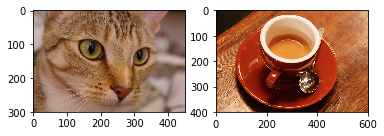

In [51]:
_, axes = plt.subplots(1, 2)
axes[0].imshow(color_images['cat'])
axes[1].imshow(color_images['coffee'])

In [49]:
def compress_show_color_images_reshape(img_name,k):
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

In [86]:
def plot_gallery_colorful(image, col, row, step):
    plt.figure(figsize=(10 * col, 10 * row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(col * row):
            plt.subplot(row, col, i + 1)
            original_shape = image.shape
            k = (i + 1) * step
            image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
            image_reconst = compress_svd(image_reshaped,k)
            image_reconst = image_reconst.reshape(original_shape)
            compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
            plt.title(str(k) + ' singular values, and compression ratio={:.2f}'.format(compression_ratio) + '%', size=12)
            plt.imshow(image_reconst, cmap='gray')
            plt.xticks(())
            plt.yticks(())

plot_gallery_colorful(color_images['cat'], 3, 5, 20)

In [87]:
plot_gallery_colorful(color_images['coffee'], 3, 5, 20)